In [38]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("students.sqlite3")
cursor = conn.cursor()


In [39]:
cursor.execute("SELECT gender, math_score, writing_score FROM students WHERE gender = 'male' AND writing_score > 90")
rows = cursor.fetchall()

# შედეგების დაბეჭდვა
print("ბიჭები, ვისაც წერაში 90-ზე მეტი ქულა აქვთ:")
for row in rows:
    print(row)


ბიჭები, ვისაც წერაში 90-ზე მეტი ქულა აქვთ:
('male', 91, 92)
('male', 100, 93)
('male', 87, 95)
('male', 96, 92)
('male', 91, 92)
('male', 94, 91)
('male', 100, 99)
('male', 97, 91)
('male', 100, 100)
('male', 91, 91)


In [42]:
gender = input("შეიყვანე სქესი (male/female): ")
math = int(input("მათემატიკის ქულა: "))
reading = int(input("წაკითხვის ქულა: "))
writing = int(input("წერითი ქულა: "))

cursor.execute("""
    INSERT INTO students (gender, math_score, reading_score, writing_score)
    VALUES (?, ?, ?, ?)
""", (gender, math, reading, writing))

conn.commit()
print("ახალი სტუდენტი წარმატებით დაემატა.")


შეიყვანე სქესი (male/female):  male
მათემატიკის ქულა:  3
წაკითხვის ქულა:  3
წერითი ქულა:  3


ახალი სტუდენტი წარმატებით დაემატა.


In [43]:
target_reading = int(input("რომელი წაკითხვის ქულის მქონე სტუდენტის ქულა გინდა განაახლო?: "))
new_math = int(input("ახალი მათემატიკის ქულა: "))

cursor.execute("""
    UPDATE students
    SET math_score = ?
    WHERE reading_score = ?
""", (new_math, target_reading))

conn.commit()
print("განახლდა მონაცემი.")


რომელი წაკითხვის ქულის მქონე სტუდენტის ქულა გინდა განაახლო?:  3
ახალი მათემატიკის ქულა:  3


განახლდა მონაცემი.


In [44]:
limit = int(input("წაშალე სტუდენტები, ვისაც წერაში ქულა ნაკლებია ვიდრე: "))
cursor.execute("DELETE FROM students WHERE writing_score < ?", (limit,))
conn.commit()

print("წაშლა დასრულებულია.")


წაშალე სტუდენტები, ვისაც წერაში ქულა ნაკლებია ვიდრე:  5


წაშლა დასრულებულია.


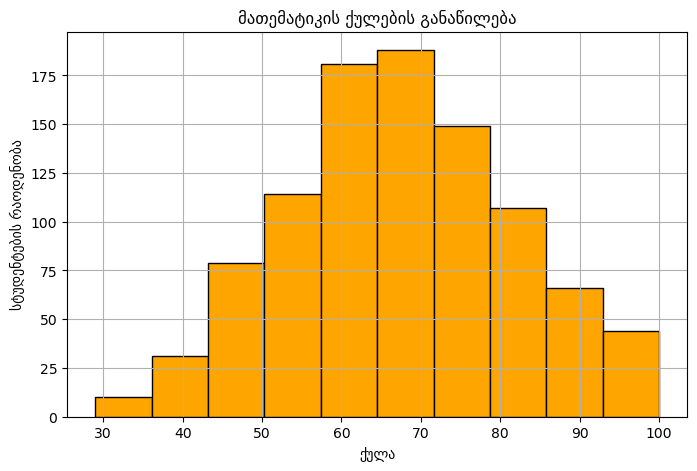

In [45]:
cursor.execute("SELECT math_score FROM students")
math_scores = [row[0] for row in cursor.fetchall()]

plt.figure(figsize=(8, 5))
plt.hist(math_scores, bins=10, color='orange', edgecolor='black')
plt.title("მათემატიკის ქულების განაწილება")
plt.xlabel("ქულა")
plt.ylabel("სტუდენტების რაოდენობა")
plt.grid(True)
plt.show()



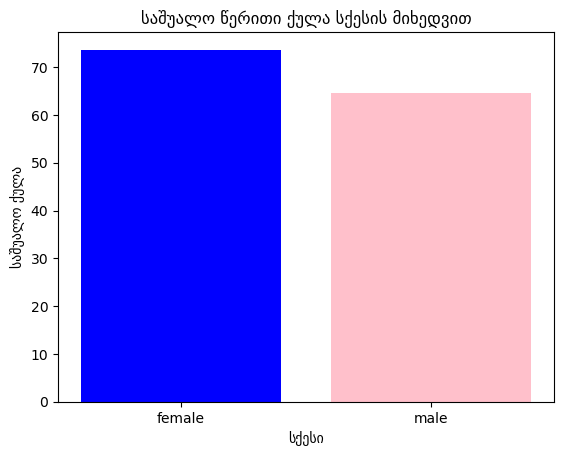

In [46]:
cursor.execute("SELECT gender, AVG(writing_score) FROM students GROUP BY gender")
results = cursor.fetchall()
genders = [row[0] for row in results]
avg_scores = [row[1] for row in results]

plt.bar(genders, avg_scores, color=['blue', 'pink'])
plt.title("საშუალო წერითი ქულა სქესის მიხედვით")
plt.xlabel("სქესი")
plt.ylabel("საშუალო ქულა")
plt.show()


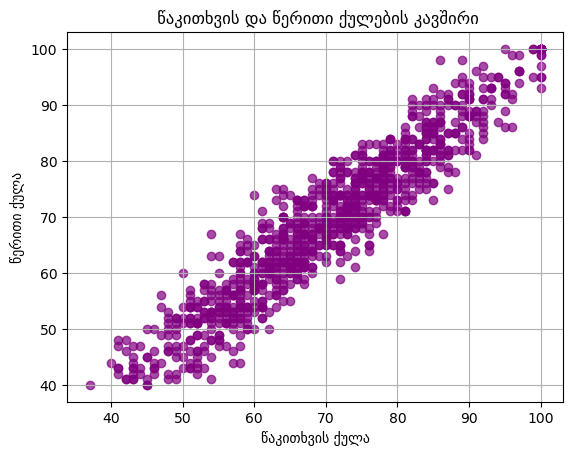

In [47]:
cursor.execute("SELECT reading_score, writing_score FROM students")
data = cursor.fetchall()

reading = [r[0] for r in data]
writing = [r[1] for r in data]

plt.scatter(reading, writing, color='purple', alpha=0.7)
plt.title(" წაკითხვის და წერითი ქულების კავშირი")
plt.xlabel("წაკითხვის ქულა")
plt.ylabel("წერითი ქულა")
plt.grid(True)
plt.show()
